<a href="https://colab.research.google.com/github/Kirushanth-G/EN3160---Image-Processing-and-Machine-Vision/blob/main/image_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.3030
Epoch 2/10, Loss: 2.3029
Epoch 3/10, Loss: 2.3029
Epoch 4/10, Loss: 2.3028
Epoch 5/10, Loss: 2.3028
Epoch 6/10, Loss: 2.3028
Epoch 7/10, Loss: 2.3027
Epoch 8/10, Loss: 2.3027
Epoch 9/10, Loss: 2.3025
Epoch 10/10, Loss: 2.3022


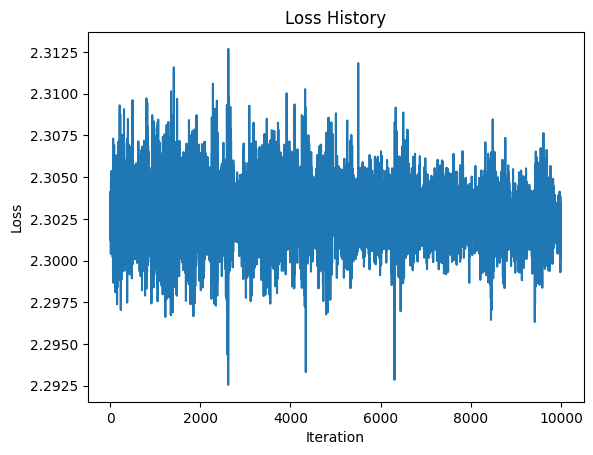

Training accuracy: 11.81%
Test accuracy: 12.03%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100             # Hidden layer size
K = 10              # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases as parameters
w1 = nn.Parameter(torch.randn(Din, H) * std)  # First layer weights
b1 = nn.Parameter(torch.zeros(H))             # First layer bias
w2 = nn.Parameter(torch.randn(H, K) * std)    # Output layer weights
b2 = nn.Parameter(torch.zeros(K))             # Output layer bias

# Define parameters list
parameters = [w1, b1, w2, b2]

# Hyperparameters
epochs = 10
lr = 2e-3  # Increased learning rate for better convergence with sigmoid
lr_decay = 0.9
reg = 0.001  # Regularization term
loss_history = []

# Optimizer
optimizer = torch.optim.SGD(parameters, lr=lr)

# 3. Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer with sigmoid
        y_pred = hidden_layer.mm(w2) + b2                  # Output layer

        # Loss calculation (Cross-Entropy Loss with regularization)
        loss = nn.CrossEntropyLoss()(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute new gradients
        optimizer.step()       # Update weights and biases

    # Print loss for every epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}")

    # Learning rate decay
    for param_group in optimizer.param_groups:
        param_group['lr'] *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden_layer.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)

        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        hidden_layer = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden_layer.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)

        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# LeNet-5 Model Definition
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # First conv layer
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)           # Second conv layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)                            # Fully connected layer 1
        self.fc2 = nn.Linear(120, 84)                                    # Fully connected layer 2
        self.fc3 = nn.Linear(84, 10)                                     # Fully connected layer 3 (output)

    def forward(self, x):
        x = torch.relu(self.conv1(x))    # First conv layer + ReLU
        x = torch.max_pool2d(x, kernel_size=2, stride=2)  # First pooling layer
        x = torch.relu(self.conv2(x))    # Second conv layer + ReLU
        x = torch.max_pool2d(x, kernel_size=2, stride=2)  # Second pooling layer
        x = x.view(-1, 16 * 5 * 5)       # Flatten for fully connected layers
        x = torch.relu(self.fc1(x))      # First fully connected layer + ReLU
        x = torch.relu(self.fc2(x))      # Second fully connected layer + ReLU
        x = self.fc3(x)                  # Output layer
        return x

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and normalize MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Initialize the network, define loss function and optimizer
net = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training the network
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    net.train()

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate training statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    train_acc = 100 * correct_train / total_train
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}, Training Accuracy: {train_acc:.2f}%")

# Evaluate the network on test data
net.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = outputs.max(1)
        total_test += labels.size(0)
        correct_test += predicted.eq(labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test Accuracy: {test_acc:.2f}%")

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.49MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.2452, Training Accuracy: 92.55%
Epoch [2/10], Loss: 0.0632, Training Accuracy: 98.05%
Epoch [3/10], Loss: 0.0453, Training Accuracy: 98.58%
Epoch [4/10], Loss: 0.0363, Training Accuracy: 98.87%
Epoch [5/10], Loss: 0.0299, Training Accuracy: 99.06%
Epoch [6/10], Loss: 0.0236, Training Accuracy: 99.25%
Epoch [7/10], Loss: 0.0210, Training Accuracy: 99.32%
Epoch [8/10], Loss: 0.0178, Training Accuracy: 99.44%
Epoch [9/10], Loss: 0.0148, Training Accuracy: 99.50%
Epoch [10/10], Loss: 0.0142, Training Accuracy: 99.54%
Test Accuracy: 98.93%


In [ ]:
# Step 1: Download and unzip the dataset
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip -d ./data/

# Step 2: Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
import time

# Step 3: Set up device for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 4: Define data transformations and load datasets
data_dir = './data/hymenoptera_data'
input_size = 224
batch_size = 8

# Define transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load dataset
image_datasets = {x: datasets.ImageFolder(root=f'{data_dir}/{x}', transform=data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# Step 5: Define a helper function to train and evaluate the model
def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass and optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Track loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    return model

# Step 6: Fine-Tuning ResNet-18
print("Fine-Tuning ResNet-18")
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))
model_ft = model_ft.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Train and evaluate
model_ft = train_model(model_ft, criterion, optimizer_ft, num_epochs=10)

# Step 7: Feature Extraction with ResNet-18
print("\nFeature Extraction with ResNet-18")
model_conv = models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Replace the last fully connected layer
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))
model_conv = model_conv.to(device)

# Only optimize the classifier layer
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Train and evaluate
model_conv = train_model(model_conv, criterion, optimizer_conv, num_epochs=10)

--2024-11-11 12:01:32--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 3.167.192.62, 3.167.192.10, 3.167.192.5, ...
Connecting to download.pytorch.org (download.pytorch.org)|3.167.192.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   222MB/s    in 0.2s    

2024-11-11 12:01:32 (222 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]

Archive:  hymenoptera_data.zip
   creating: ./data/hymenoptera_data/
   creating: ./data/hymenoptera_data/train/
   creating: ./data/hymenoptera_data/train/ants/
  inflating: ./data/hymenoptera_data/train/ants/0013035.jpg  
  inflating: ./data/hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: ./data/hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: ./data/hymenoptera_data/train/ants/1099452230_d1

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


Epoch 1/10
----------
train Loss: 0.4722 Acc: 0.7500
val Loss: 0.2869 Acc: 0.9085
Epoch 2/10
----------
train Loss: 0.3356 Acc: 0.8484
val Loss: 0.1731 Acc: 0.9216
Epoch 3/10
----------
train Loss: 0.2488 Acc: 0.8975
val Loss: 0.2246 Acc: 0.9216
Epoch 4/10
----------
train Loss: 0.2497 Acc: 0.9016
val Loss: 0.1914 Acc: 0.9412
Epoch 5/10
----------
train Loss: 0.2970 Acc: 0.8689
val Loss: 0.2308 Acc: 0.9216
Epoch 6/10
----------
train Loss: 0.3405 Acc: 0.8484
val Loss: 0.2489 Acc: 0.9346
Epoch 7/10
----------
train Loss: 0.1464 Acc: 0.9385
val Loss: 0.2896 Acc: 0.9281
Epoch 8/10
----------
train Loss: 0.2835 Acc: 0.8934
val Loss: 0.2305 Acc: 0.9477
Epoch 9/10
----------
train Loss: 0.1695 Acc: 0.9180
val Loss: 0.3563 Acc: 0.8758
Epoch 10/10
----------
train Loss: 0.1321 Acc: 0.9590
val Loss: 0.2211 Acc: 0.9477

Feature Extraction with ResNet-18
Epoch 1/10
----------
train Loss: 0.6124 Acc: 0.6230
val Loss: 0.5160 Acc: 0.7778
Epoch 2/10
----------
train Loss: 0.3012 Acc: 0.8730
val Loss: